<a href="https://colab.research.google.com/github/prototype99/datasci-webinar/blob/main/pods_2223_w9_webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PoDS 22-23 Week 9 Webinar

## Preamble (Packages)

In [ ]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (8,6)}, style='ticks', context='talk', font_scale=0.8)

## Datasets

In [ ]:
diabetes = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0015-2223/main/datasets/diabetes.csv'
)
diabetes.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [ ]:
gm = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0026-2223/main/datasets/gapminder.tsv',
    sep='\t'
)
gm.head(1)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314


In [ ]:
titanic = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0015-2223/main/datasets/titanic.csv'
)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


## Grouping: Apply, Transform

In [ ]:
titanic['Age'].fillna(titanic['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
# 1. subsetting the data on which values will be imputed
# 2. here, we are taking summary statistics from that subset as imputation values
# 3. normally, we want to keep track of filled data (e.g., overwriting the 
# slice of the data)
titanic['Age'] = (
    titanic['Age'].fillna(titanic['Age'].median())
)

In [ ]:
# .assign() - perhaps more suitable for pipelining mindset?
# produces a new DataFrame; the unaffected columns are simply passed through
titanic.assign(
    Age=titanic['Age'].fillna(titanic['Age'].median()),
    Sex=titanic['Sex'].str.title()
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",Female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",Male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
np.random.normal(titanic['Age'].mean(), titanic['Age'].std(), size=50)

array([ 35.77540661,  31.93980784,  22.2926673 ,  40.94216404,
        32.58886282,  46.11820696,  33.71579857,   8.453063  ,
        18.15731049,   7.64588076,  52.13868095,  38.54003702,
        23.60759061,  25.29931946,  58.23880222,  11.47828364,
        32.45363039,  27.61925389,  22.28127704,  36.96209285,
        22.98710252,  23.03451255,  34.48913461,  44.91350598,
        11.71271924,  22.07656861,  14.92470701,  25.18747704,
        40.75805034,  18.4229044 ,  25.32805141,  28.22012725,
        24.08743028,  30.47368197,  17.00710631,   9.19485652,
        39.47173248,  49.92419901,  28.05227104,  51.31927365,
        55.2066141 ,  62.08086231,  33.20273047,  31.35150514,
        25.82115924,  56.59311421,   4.28126533,  30.41138519,
       -18.76935306,  15.83084549])

In [ ]:
np.linspace(0, 100, 5)

array([  0.,  25.,  50.,  75., 100.])

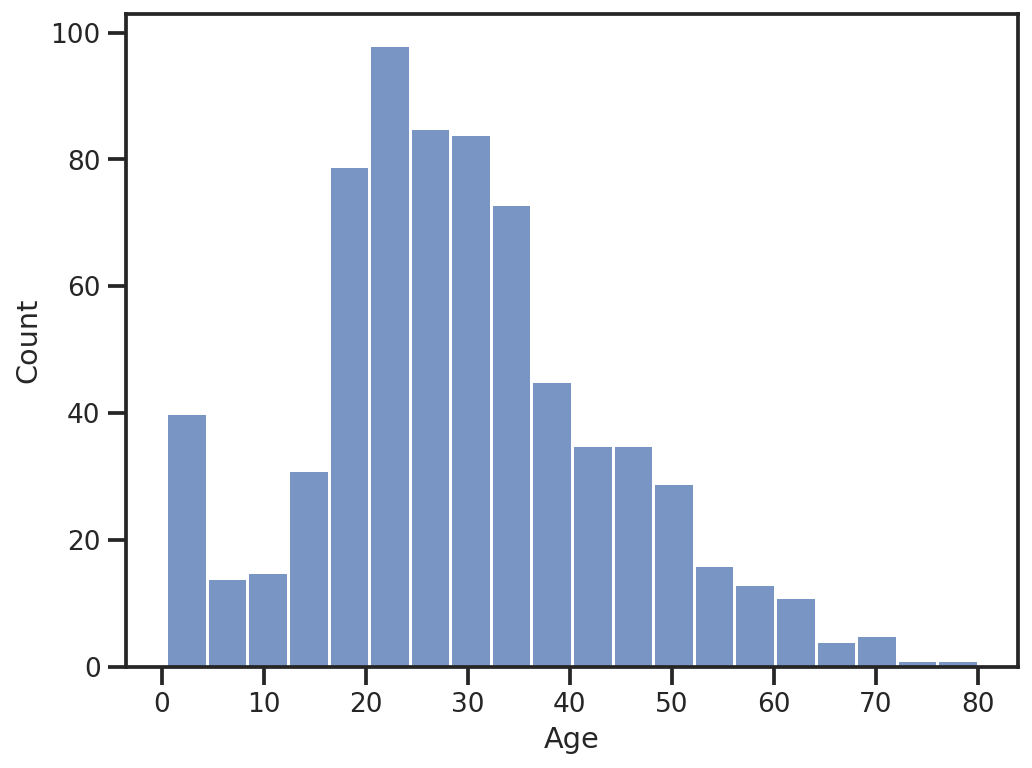

In [ ]:
sns.histplot(titanic['Age']);

In [ ]:
np.random.random(size=50)

array([0.81466733, 0.56660782, 0.11128639, 0.87758819, 0.49821129,
       0.67453436, 0.56904137, 0.35228999, 0.77672644, 0.13439472,
       0.6917959 , 0.75638406, 0.88049241, 0.31144918, 0.33845502,
       0.96802382, 0.19429427, 0.29868772, 0.92010689, 0.22872301,
       0.04967381, 0.11862935, 0.14929873, 0.98182789, 0.76214599,
       0.76928411, 0.65539907, 0.34608273, 0.3628182 , 0.75571964,
       0.47876715, 0.89778213, 0.80832639, 0.28063495, 0.97940358,
       0.03166575, 0.47332006, 0.57058604, 0.43481494, 0.77004894,
       0.75590167, 0.6526933 , 0.81193872, 0.51164378, 0.33084476,
       0.17987588, 0.59258344, 0.60175365, 0.32856185, 0.11821863])

In [ ]:
np.random.randint(1, 100, size=1)[0]

19

In [ ]:
titanic.assign(
    Age=titanic['Age'].fillna(np.random.randint(1, 100, size=1)[0]),
    Sex=titanic['Sex'].str.title()
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",Female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Female,71.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",Male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [ ]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q


In [ ]:
# not sure if works for the whole of the data
# the idea is to extract the title of the person that is present in most names,
# it seems. The pattern provided is "match any number of characters before a 
# comma-space; then, extract the word that follows it"
title = titanic['Name'].str.extract(r'.+, (\w+)')

In [ ]:
title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Ms            1
Capt          1
Mme           1
Lady          1
Jonkheer      1
Don           1
the           1
dtype: int64

In [ ]:
titanic[ titanic['Cabin'].notnull() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
titanic.loc[ titanic['Cabin'].notnull(), 'Cabin' ]

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [ ]:
# if there is noisy/inconsistent data, this would of course produce strange results
# at times
deck = titanic.loc[ titanic['Cabin'].notnull(), 'Cabin' ].str[0]
deck.head()

1     C
3     C
6     E
10    G
11    C
Name: Cabin, dtype: object

In [ ]:
# For another opportunity...
titanic[['Sex','Age','Fare','Parch']].groupby('Sex').apply(np.mean)

In [ ]:
# For another opportunity...
to_impute = titanic[['Sex','Age','Fare','Parch']].groupby('Sex').apply(np.mean)

In [ ]:
# For another opportunity...
titanic.query("Sex=='male'")[['Sex','Age','Fare','Parch']].fillna(to_impute.loc['male'])

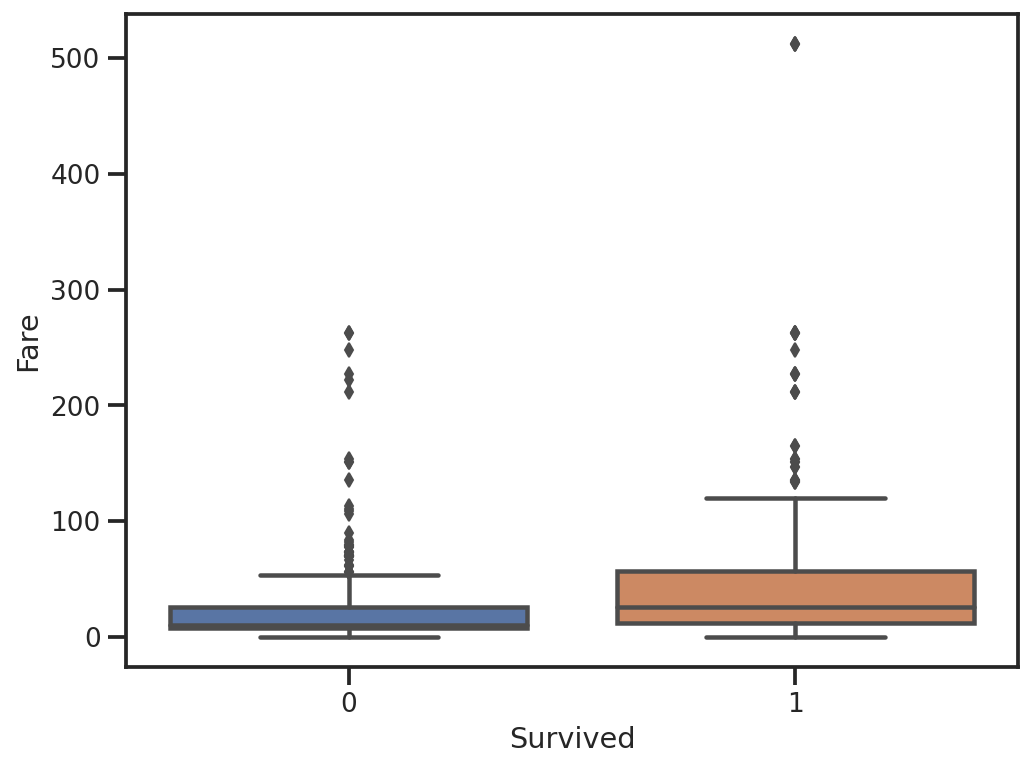

In [ ]:
sns.boxplot(y=titanic['Fare'], x=titanic['Survived'])